In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
### Reading the csv file
df = pd.read_csv('assignment-1-data.csv')
df.shape

(2938, 22)

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
### Checking if there is any null values in our data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# Dropping the NaN Values that affects our Life expectancy 
df = df.dropna(subset=['Schooling','Income composition of resources','Life expectancy ','Adult Mortality',' BMI '])

In [6]:
# Check
df.shape

(2736, 22)

In [7]:
# Check
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            167
percentage expenditure               0
Hepatitis B                        489
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                8
Total expenditure                  172
Diphtheria                           8
 HIV/AIDS                            0
GDP                                278
Population                         484
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

In [8]:
# Deciding which features affects the value of life expentancy
cm = df.corr(method='pearson')

<AxesSubplot:>

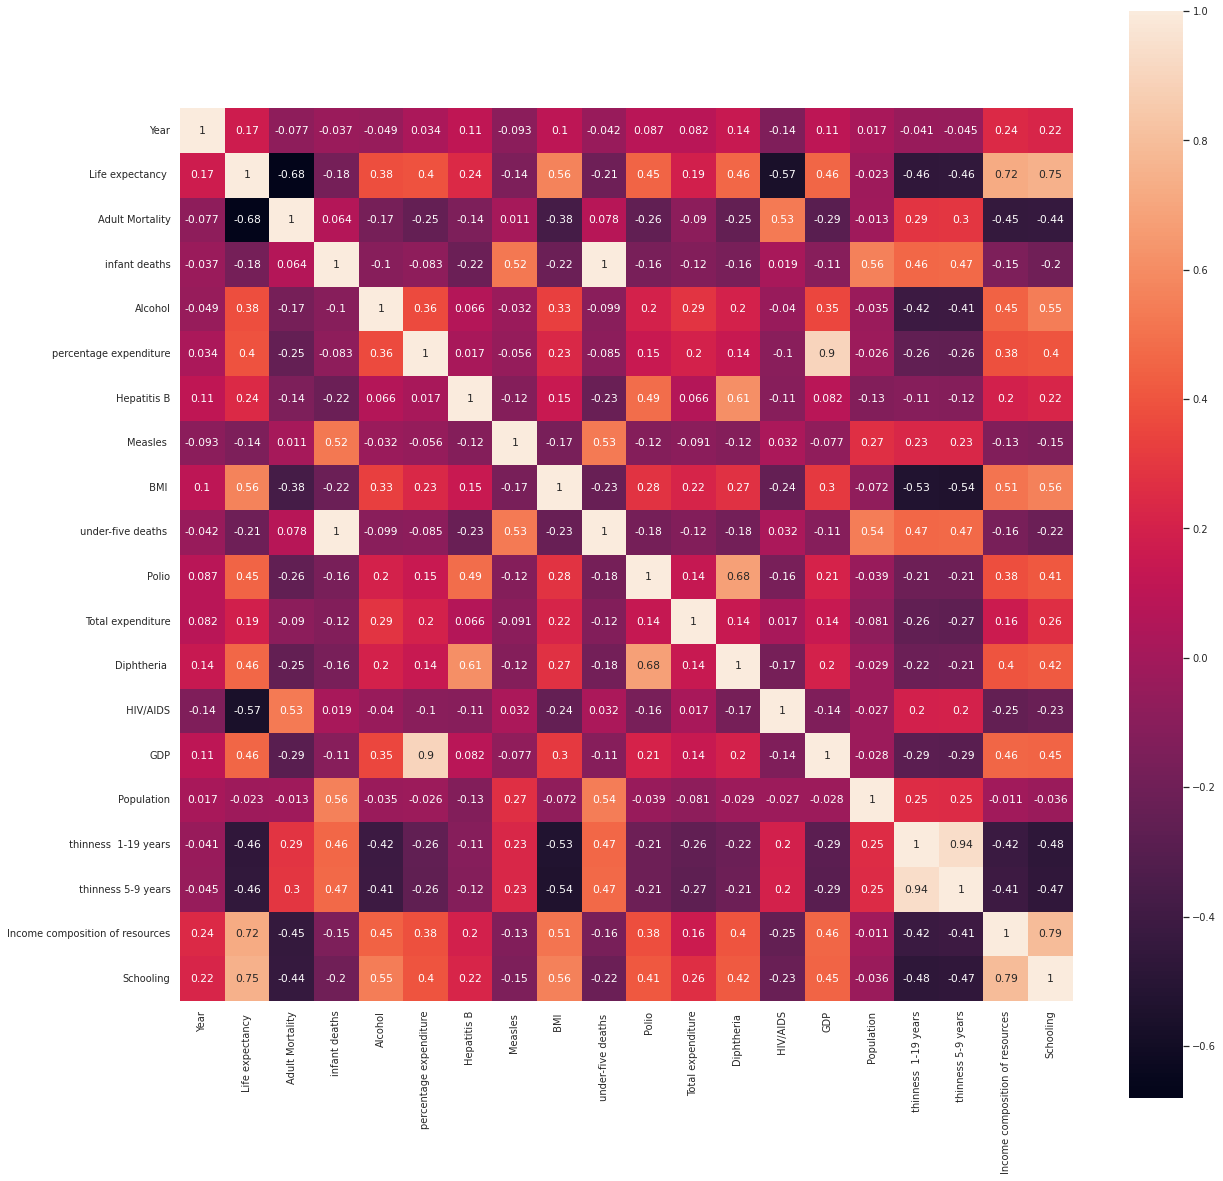

In [9]:
# Visualizing
sns.set(font_scale=0.9,rc = {'figure.figsize':(20,20)})

sns.heatmap(cm, cbar=True, annot=True, square=True)

In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# Dropping unneccery columns
df.drop(columns = ['Country','Year','Status','infant deaths','percentage expenditure','Hepatitis B','Measles ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Alcohol'],inplace=True ,axis = 1)

In [12]:
df.head()

,Life expectancy,Adult Mortality,BMI,Income composition of resources,Schooling
0,65.0,263.0,19.1,0.479,10.1
1,59.9,271.0,18.6,0.476,10.0
2,59.9,268.0,18.1,0.470,9.9
3,59.5,272.0,17.6,0.463,9.8
4,59.2,275.0,17.2,0.454,9.5


In [13]:
# Splitting Data

x = df.iloc[:,[1,2,3,4]].values # variables
y = df.iloc[:,[0]].values # Life expectancy

In [14]:
x

array([[2.63e+02, 1.91e+01, 4.79e-01, 1.01e+01],
       [2.71e+02, 1.86e+01, 4.76e-01, 1.00e+01],
       [2.68e+02, 1.81e+01, 4.70e-01, 9.90e+00],
       ...,
       [7.30e+01, 2.63e+01, 4.27e-01, 1.00e+01],
       [6.86e+02, 2.59e+01, 4.27e-01, 9.80e+00],
       [6.65e+02, 2.55e+01, 4.34e-01, 9.80e+00]])

In [15]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [16]:
# Splitting data part2
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [17]:
x_train

array([[125.   ,  59.7  ,   0.834,  15.3  ],
       [189.   ,  55.5  ,   0.812,  15.9  ],
       [221.   ,   5.2  ,   0.681,  13.1  ],
       ...,
       [211.   ,  13.5  ,   0.526,   9.4  ],
       [284.   ,  44.4  ,   0.685,  12.3  ],
       [ 98.   ,  57.1  ,   0.866,  18.1  ]])

In [18]:
y_train

array([[76.8],
       [72.8],
       [67.7],
       ...,
       [64.4],
       [64.4],
       [78.4]])

In [19]:
# Scaling our features to -1 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_xtrain=scaler.fit_transform(x_train)

In [20]:
scaled_xtrain

array([[0.17318436, 0.76509186, 0.87974684, 0.74634146],
       [0.26256983, 0.70997375, 0.85654008, 0.77560976],
       [0.30726257, 0.04986877, 0.71835443, 0.63902439],
       ...,
       [0.29329609, 0.15879265, 0.55485232, 0.45853659],
       [0.3952514 , 0.56430446, 0.72257384, 0.6       ],
       [0.13547486, 0.73097113, 0.91350211, 0.88292683]])

In [21]:
# Creating our model
model = LinearRegression()

In [22]:
# Fitting our model
model.fit(scaled_xtrain,y_train)

LinearRegression()

In [23]:
# Scaling our test values to 0-1 scale NOT FITTING
scaled_Xtest=scaler.transform(x_test)

In [24]:
# Running our model and predicting
y_predict=model.predict(scaled_Xtest)

In [25]:
# Evaluating
model.score(scaled_Xtest,y_test)

0.7635993944498098

In [26]:
# Other evaluating methods
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict))

3.314590798668559
22.096813506636703
0.7635993944498098
